# EDA RECUPERACIÓN 
## Centros Especialización New York
Existen varios centros especializados de educación (alto rendimiento) en la ciudad de Nueva York, a los que pueden acceder estudiantes tras superar el colegio. En estos centros se ofrece a los alumnos asignaturas avanzadas en arte, música o matemáticas.

El acceso a los centros de especialización ha sido siempre motivo de debate en al ciudad, puesto que se presupone que existe un trato favorable a estudiantes de raza blanca, en detrimento de latinos y negros.

¿Cómo es el proceso de admisión? Lo primero, los alumnos eligen los centros en un ranking. Después realizan un examen (SHSAT), y en función de una notas de corte, se reparten los estudiantes en los distintos centros. Las notas las establece cada centro, y cambian todos los años, dependiendo de la cantidad de plazas disponibles y el número de aplicaciones. **El problema reside en que no se publican esas notas de corte**, y se sospecha que los criterios no san tan objetivos.

[Noticia NYTimes](https://www.nytimes.com/2018/06/21/nyregion/what-is-the-shsat-exam-and-why-does-it-matter.html)

Por tanto, nos encontramos ante la siguiente problemática:
1. Bajo número de estudiantes negros y latinos en centros de especialización
2. Sólo el 10% de los colegios de Nueva York reciben ofertas de centros de especialización, aún habiendo un 67% de estudiantes negros y latinos en Nueva York.
3. Los asiáticos suponen un 62% de los estudiantes de los centros de especialización, aún habiendo únicamente un 16% de estudiantes asiáticos en los colegios.
4. Los blancos suponen un 24% de los estudiantes de los centros de especialización, aún habiendo únicamente un 15% de estudiantes blancos en los colegios.

**El objetivo de este ejecicio es realizar un análisis exploratorio de datos para determinar el estado de las ayudas y necesidades de los colegios de Nueva York, y con ello poder tomar decisiones BASADAS EN LOS DATOS. Para el análisis utilizarás datos como las localizaciones geográficas de los colegios, pertenencia comunitaria, raza de los estudiantes y nivel académico.**

Por tanto, consideraremos las siguientes hipótesis que habrá que razonar con los datos disponibles:
1. Si un colegio pertenece o no a una comunidad tiene impacto en las ayudas económicas recibidas.
2. Hay centros con mayoría de estudiantes hispanos o negros que tienen más necesidades económicas que los centros con mayoría de raza blanca.
3. La localización de los colegios está afectando a las ayudas.
4. Los centros con mayores necesidades tienen un % de asistencia a clase más bajo.



<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/3/3d/Map_of_New_York_Economic_Regions.svg/2000px-Map_of_New_York_Economic_Regions.svg.png'/>

In [ ]:
# 1.- Western New York
# 2.- Finger Lakes
# 3.- Southern Tier
# 4.- Central New York
# 5.- North Country
# 6.- Mohawk Valley
# 7.- Capital District
# 8.- Hudson Valley
# 9.- New York City
# 10.- Long Island

Para contrastar estas hipótesis, tendrás que llevar a cabo los siguientes pasos en la analítica. Comenta qué observas en cada punto

1. Leer los datasets, haz las limpiezas pertinentes y obtén sus estadísticos básicos.

In [247]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import  plotly.express as px
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import numpy as np
import cufflinks as cf
cf.go_offline()



In [42]:
%pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [43]:
%pip install wordcloud
%pip install ipykernel
%pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [44]:
%pip install ipywidgets
%pip install geocoder
%pip install geopy
%pip install vega_datasets

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [45]:
%pip install shapely

Note: you may need to restart the kernel to use updated packages.


In [46]:
%pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [47]:
%pip install plotly-geo==1.0.0
%pip install geopandas==0.3.0
%pip install pyshp==1.2.10
%pip install shapely==1.6.3

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached Shapely-1.6.3.tar.gz (223 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [10 lines of output]
      Traceback (most recent call last):
        File "<string>", line 36, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\Bogdan\AppData\Local\Temp\pip-install-oklpihmy\shapely_1e1f76b446d843a4abd86f2907f302ee\setup.py", line 80, in <module>
          from shapely._buildcfg import geos_version_string, geos_version, \
        File "C:\Users\Bogdan\AppData\Local\Temp\pip-install-oklpihmy\shapely_1e1f76b446d843a4abd86f2907f302ee\shapely\_buildcfg.py", line 200, in <module>
          lgeos = CDLL("geos_c.dll")
        File "c:\Users\Bogdan\AppData\Local\Programs\Python\Python37\lib\ctypes\__init__.py", line 364, in __init__
          self._handle = _dlopen(self._name, mode)
      OSError: [WinError 126] No se puede encontrar el mÃ³dulo especificado
      [end of output]
  
  note: This error originates f

In [248]:
# Se leen los dos archivos

df_schools = pd.read_csv("C:\\Users\\Bogdan\\Desktop\\Bootcamp noviembre\\Recuperacion\\data\\2016 School Explorer.csv")
df_registrations = pd.read_csv("C:\\Users\\Bogdan\\Desktop\\Bootcamp noviembre\\Recuperacion\\data\\D5 SHSAT Registrations and Testers.csv")

# La prueba Specialized High Schools Admissions Test (SHSAT) es un examen para estudiantes que han terminado el colegio y que residen en la ciudad de Nueva York. 
# Estos centros ofrecen especialidades en arte, musica y matematicas.


In [292]:
df_schools.head()

Adjusted Grade New? Other Location Code in LCGMS  \
0            NaN  NaN                          NaN   
1            NaN  NaN                          NaN   
2            NaN  NaN                          NaN   
3            NaN  NaN                          NaN   
4            NaN  NaN                          NaN   

                      School Name      SED Code Location Code  District  \
0       P.S. 015 ROBERTO CLEMENTE  310100010015        01M015         1   
1             P.S. 019 ASHER LEVY  310100010019        01M019         1   
2            P.S. 020 ANNA SILVER  310100010020        01M020         1   
3  P.S. 034 FRANKLIN D. ROOSEVELT  310100010034        01M034         1   
4       THE STAR ACADEMY - P.S.63  310100010063        01M063         1   

    Latitude  Longitude                    Address (Full)  ...  \
0  40.721834 -73.978766   333 E 4TH ST NEW YORK, NY 10009  ...   
1  40.729892 -73.984231    185 1ST AVE NEW YORK, NY 10003  ...   
2  40.721274 -73.986315   166 ESSEX ST NEW YORK, NY 10002  ...   
3  40.726147 -73.975043  730 E 12TH ST NEW YORK, NY 10009  ...   
4  40.724404 -73.986360   121 E 3RD ST NEW YORK, NY 10009  ...   

  Grade 8 Math - All Students Tested  Grade 8 Math 4s - All Students  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                 48                               1   
4                                  0                               0   

  Grade 8 Math 4s - American Indian or Alaska Native  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

  Grade 8 Math 4s - Black or African American  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

  Grade 8 Math 4s - Hispanic or Latino  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

  Grade 8 Math 4s - Asian or Pacific Islander  Grade 8 Math 4s - White  \
0                                           0                        0   
1                                           0                        0   
2                                           0                        0   
3                                           0                        0   
4                                           0                        0   

  Grade 8 Math 4s - Multiracial Grade 8 Math 4s - Limited English Proficient  \
0                             0                                            0   
1                             0                                            0   
2                             0                                            0   
3                             0                                            0   
4                             0                                            0   

  Grade 8 Math 4s - Economically Disadvantaged  
0                                            0  
1                                            0  
2                                            0  
3                                            0  
4                                            0  

[5 rows x 161 columns]

In [291]:
df_schools.info(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 161 columns):
 #    Column                                              Dtype  
---   ------                                              -----  
 0    Adjusted Grade                                      object 
 1    New?                                                object 
 2    Other Location Code in LCGMS                        object 
 3    School Name                                         object 
 4    SED Code                                            int64  
 5    Location Code                                       object 
 6    District                                            int64  
 7    Latitude                                            float64
 8    Longitude                                           float64
 9    Address (Full)                                      object 
 10   City                                                object 
 11   Zip                         

In [250]:
df_schools.describe()
# hay demasiadas columnas y con el describe no se ven datos que puedan interesar. Se cortara mas adelante.

SED Code    District     Latitude    Longitude           Zip  \
count  1.272000e+03  1272.00000  1272.000000  1272.000000   1272.000000   
mean   3.286698e+11    16.13522    40.734537   -73.918347  10815.720912   
std    1.222022e+10     9.24527     0.086602     0.080576    529.588875   
min    3.075000e+11     1.00000    40.507803   -74.244025  10001.000000   
25%    3.208752e+11     9.00000    40.669499   -73.957057  10452.000000   
50%    3.315004e+11    15.00000    40.722995   -73.920571  11203.000000   
75%    3.424000e+11    24.00000    40.815632   -73.879264  11232.000000   
max    3.531009e+11    32.00000    40.903455   -73.708920  11694.000000   

       Economic Need Index  Average ELA Proficiency  Average Math Proficiency  \
count          1247.000000              1217.000000               1217.000000   
mean              0.672281                 2.534215                  2.668956   
std               0.210959                 0.363589                  0.470470   
min               0.049000                 1.810000                  1.830000   
25%               0.550000                 2.250000                  2.300000   
50%               0.731000                 2.450000                  2.580000   
75%               0.841000                 2.760000                  2.980000   
max               0.957000                 3.930000                  4.200000   

       Grade 3 ELA - All Students Tested  Grade 3 ELA 4s - All Students  ...  \
count                        1272.000000                    1272.000000  ...   
mean                           60.569182                       4.952830  ...   
std                            57.872496                       8.300568  ...   
min                             0.000000                       0.000000  ...   
25%                             0.000000                       0.000000  ...   
50%                            54.000000                       1.000000  ...   
75%                            94.000000                       7.000000  ...   
max                           356.000000                      55.000000  ...   

       Grade 8 Math - All Students Tested  Grade 8 Math 4s - All Students  \
count                         1272.000000                     1272.000000   
mean                            43.841195                        4.911950   
std                             82.878780                       20.792371   
min                              0.000000                        0.000000   
25%                              0.000000                        0.000000   
50%                              0.000000                        0.000000   
75%                             59.000000                        1.000000   
max                            652.000000                      312.000000   

       Grade 8 Math 4s - American Indian or Alaska Native  \
count                                        1272.000000    
mean                                            0.003145    
std                                             0.068635    
min                                             0.000000    
25%                                             0.000000    
50%                                             0.000000    
75%                                             0.000000    
max                                             2.000000    

       Grade 8 Math 4s - Black or African American  \
count                                  1272.000000   
mean                                      0.610063   
std                                       3.966083   
min                                       0.000000   
25%                                       0.000000   
50%                                       0.000000   
75%                                       0.000000   
max                                     107.000000   

       Grade 8 Math 4s - Hispanic or Latino  \
count                           1272.000000   
mean                               0.947327   
std         

In [51]:
df_registrations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   DBN                                              140 non-null    object
 1   School name                                      140 non-null    object
 2   Year of SHST                                     140 non-null    int64 
 3   Grade level                                      140 non-null    int64 
 4   Enrollment on 10/31                              140 non-null    int64 
 5   Number of students who registered for the SHSAT  140 non-null    int64 
 6   Number of students who took the SHSAT            140 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 7.8+ KB


In [52]:
df_registrations.describe()
# aqui ya se puede observar que las medias de los alumnos que se registran respecto a los alumnos que se acaban inscribiendo estan bastante alejadas.

Year of SHST  Grade level  Enrollment on 10/31  \
count    140.000000   140.000000           140.000000   
mean    2014.542857     8.392857            91.971429   
std        1.121224     0.490139            47.494027   
min     2013.000000     8.000000            17.000000   
25%     2014.000000     8.000000            62.750000   
50%     2015.000000     8.000000            86.000000   
75%     2016.000000     9.000000           113.000000   
max     2016.000000     9.000000           344.000000   

       Number of students who registered for the SHSAT  \
count                                       140.000000   
mean                                         19.071429   
std                                          23.280165   
min                                           0.000000   
25%                                           2.000000   
50%                                          12.000000   
75%                                          26.000000   
max                                         118.000000   

       Number of students who took the SHSAT  
count                             140.000000  
mean                                9.664286  
std                                10.149679  
min                                 0.000000  
25%                                 1.000000  
50%                                 6.000000  
75%                                14.000000  
max                                45.000000

In [53]:
df_registrations.head()

DBN               School name  Year of SHST  Grade level  \
0  05M046    P.S. 046 Arthur Tappan          2013            8   
1  05M046    P.S. 046 Arthur Tappan          2014            8   
2  05M046    P.S. 046 Arthur Tappan          2015            8   
3  05M046    P.S. 046 Arthur Tappan          2016            8   
4  05M123  P.S. 123 Mahalia Jackson          2013            8   

   Enrollment on 10/31  Number of students who registered for the SHSAT  \
0                   91                                               31   
1                   95                                               26   
2                   73                                               21   
3                   56                                               20   
4                   62                                               31   

   Number of students who took the SHSAT  
0                                     14  
1                                      7  
2                                     10  
3                                      8  
4                                     14

In [312]:
# Se ajusta el dataFrame

df_schools_col = df_schools.iloc[:, :41]
df_schools_col.reset_index(inplace=True)


In [300]:
# index                                     # índice
# Adjusted Grade                            # Grado ajustado
# New?                                      # ¿Nuevo?
# Other Location Code in LCGMS              # Otro código de ubicación en LCGMS
# School Name                               # Nombre de escuela
# SED Code                                  # Código SED
# Location Code                             # Código de localización
# District                                  # Distrito
# Latitude                                  # Latitud
# Longitude                                 # Longitud
# Address (Full)                            # Dirección (completa)
# City                                      # Ciudad
# Zip                                       # Cremallera
# Grades                                    # Los grados
# Grade Low                                 # Grado Bajo
# Grade High                                # Grado Alto
# Community School?                         # ¿Escuela comunitária?
# Economic Need Index                       # Índice de Necesidad Económica
# School Income Estimate                    # Estimación de ingresos escolares
# Percent ELL (English Language Learner)    # Porcentaje ELL (estudiantes que están aprendiendo inglés)
# Percent Asian                             # Porcentaje asiático
# Percent Black                             # Porcentaje Negro
# Percent Hispanic                          # Porcentaje Hispano
# Percent Black / Hispanic                  # Porcentaje Negro / Hispano
# Percent White                             # Porcentaje Blanco
# Student Attendance Rate                   # Tasa de asistencia estudiantil
# Percent of Students Chronically Absent    # Porcentaje de Estudiantes Crónicamente Ausentes
# Rigorous Instruction %                    # Instrucción rigurosa %
# Rigorous Instruction Rating               # Calificación de instrucción rigurosa
# Collaborative Teachers %                  # Docentes colaborativos %
# Collaborative Teachers Rating             # Calificación de maestros colaborativos
# Supportive Environment %                  # Ambiente de apoyo %
# Supportive Environment Rating             # Calificación de entorno de apoyo
# Effective School Leadership %             # Liderazgo escolar efectivo %
# Effective School Leadership Rating        # Calificación de liderazgo escolar efectivo
# Strong Family-Community Ties %            # Fuertes lazos familia-comunidad %
# Strong Family-Community Ties Rating       # Fuertes lazos entre la familia y la comunidad Calificación
# Trust %                                   # Confianza %
# Trust Rating                              # Clasificación de confianza
# Student Achievement Rating                # Calificación de rendimiento estudiantil
# Average ELA Proficiency                   # Dominio promedio de ELA
# Average Math Proficiency                  # Competencia matemática promedio


In [313]:
# porcentajes por razas

df_schools_col.iloc[:, 19:30].head(10)

Percent ELL Percent Asian Percent Black Percent Hispanic  \
0          9%            5%           32%              60%   
1          5%           10%           20%              63%   
2         15%           35%            8%              49%   
3          7%            5%           29%              63%   
4          3%            4%           20%              65%   
5          6%            7%           19%              66%   
6          1%           16%           10%              43%   
7         12%           21%           20%              55%   
8         14%            5%           13%              78%   
9          8%            6%           11%              78%   

  Percent Black / Hispanic Percent White Student Attendance Rate  \
0                      92%            1%                     94%   
1                      83%            6%                     92%   
2                      57%            4%                     94%   
3                      92%            4%                     92%   
4                      84%           10%                     93%   
5                      84%            7%                     92%   
6                      53%           27%                     95%   
7                      75%            3%                     91%   
8                      90%            3%                     93%   
9                      90%            2%                     92%   

  Percent of Students Chronically Absent Rigorous Instruction %  \
0                                    18%                    89%   
1                                    30%                    96%   
2                                    20%                    87%   
3                                    28%                    85%   
4                                    23%                    90%   
5                                    33%                    93%   
6                                    13%                    88%   
7                                    36%                    87%   
8                                    27%                    94%   
9                                    27%                    92%   

  Rigorous Instruction Rating Collaborative Teachers %  
0              Meeting Target                      94%  
1                         NaN                      96%  
2              Meeting Target                      77%  
3          Approaching Target                      78%  
4              Meeting Target                      88%  
5              Meeting Target                      99%  
6            Exceeding Target                      78%  
7          Approaching Target                      89%  
8              Meeting Target                      91%  
9              Meeting Target                      89%

In [314]:

df_schools_col.iloc[:, 30:42].head(2)

Collaborative Teachers Rating Supportive Environment %  \
0                Meeting Target                      86%   
1                           NaN                      97%   

  Supportive Environment Rating Effective School Leadership %  \
0              Exceeding Target                           91%   
1                           NaN                           90%   

  Effective School Leadership Rating Strong Family-Community Ties %  \
0                   Exceeding Target                            85%   
1                   Exceeding Target                            86%   

  Strong Family-Community Ties Rating Trust %      Trust Rating  \
0                      Meeting Target     94%  Exceeding Target   
1                      Meeting Target     94%    Meeting Target   

  Student Achievement Rating  Average ELA Proficiency  \
0         Approaching Target                     2.14   
1           Exceeding Target                     2.63   

   Average Math Proficiency  
0                      2.17  
1                      2.98

In [316]:
# Grados

df_gra_3 = df_schools.iloc[:, 41:61] # Grade 3
df_gra_3.reset_index(inplace=True)

df_gra_4 = df_schools.iloc[:, 61:81] # Grade 4
df_gra_4.reset_index(inplace=True)

df_gra_5 = df_schools.iloc[:, 81:101] # Grade 5
df_gra_5.reset_index(inplace=True)

df_gra_6 = df_schools.iloc[:, 101:121] # Grade 6
df_gra_6.reset_index(inplace=True)

df_gra_7 = df_schools.iloc[:, 121:141] # Grade 7
df_gra_7.reset_index(inplace=True)

df_gra_8 = df_schools.iloc[:, 141:161] # Grade 8
df_gra_8.reset_index(inplace=True)

In [317]:

list(df_gra_3.columns)

['index',
 'Grade 3 ELA - All Students Tested',
 'Grade 3 ELA 4s - All Students',
 'Grade 3 ELA 4s - American Indian or Alaska Native',
 'Grade 3 ELA 4s - Black or African American',
 'Grade 3 ELA 4s - Hispanic or Latino',
 'Grade 3 ELA 4s - Asian or Pacific Islander',
 'Grade 3 ELA 4s - White',
 'Grade 3 ELA 4s - Multiracial',
 'Grade 3 ELA 4s - Limited English Proficient',
 'Grade 3 ELA 4s - Economically Disadvantaged',
 'Grade 3 Math - All Students tested',
 'Grade 3 Math 4s - All Students',
 'Grade 3 Math 4s - American Indian or Alaska Native',
 'Grade 3 Math 4s - Black or African American',
 'Grade 3 Math 4s - Hispanic or Latino',
 'Grade 3 Math 4s - Asian or Pacific Islander',
 'Grade 3 Math 4s - White',
 'Grade 3 Math 4s - Multiracial',
 'Grade 3 Math 4s - Limited English Proficient',
 'Grade 3 Math 4s - Economically Disadvantaged']

In [318]:
# valores unicos de cada columna

df_schools_col['District'].unique() 
df_schools_col['City'].unique() 

df_schools_col['Community School?'].unique() 

df_schools_col['Grades'].unique()
df_schools_col['Grade Low'].unique() 

df_schools_col['Economic Need Index'].unique() 
df_schools_col['School Income Estimate'].unique()

df_schools_col['Student Attendance Rate'].unique() 
df_schools_col['Percent of Students Chronically Absent'].unique() 

df_schools_col['Student Achievement Rating'].unique() 
df_schools_col['Average ELA Proficiency'].unique() 
df_schools_col['Average Math Proficiency'].unique() 

df_schools_col['Percent ELL'].unique() 


df_schools_col['Average Math Proficiency'].unique()


array([2.17, 2.98, 2.54, 2.47, 2.48, 3.2 , 2.73, 2.27, 2.31, 3.63, 2.32,
       1.83, 2.  , 2.2 , 2.99, 2.68, 3.08, 2.9 , 4.03, 3.01, 3.14, 3.24,
       3.41, 3.71, 3.35, 3.4 , 3.65, 3.7 , 3.55, 2.83, 3.62, 3.91, 3.25,
       3.94, 3.17, 3.29, 3.61, 3.02, 3.43, 3.74, 3.34, 3.59, 3.39, 2.97,
       3.45, 2.75, 3.36, 3.32, 3.26, 3.75,  nan, 2.23, 3.58, 2.95, 3.38,
       3.21, 2.76, 1.95, 2.88, 2.58, 3.66, 2.24, 3.  , 2.16, 2.03, 3.3 ,
       2.41, 3.54, 2.44, 2.1 , 3.68, 1.93, 2.52, 3.57, 2.64, 2.5 , 3.03,
       4.15, 1.99, 2.45, 3.37, 3.85, 2.22, 3.23, 3.89, 2.12, 2.07, 2.57,
       2.4 , 2.8 , 2.39, 2.19, 2.71, 2.7 , 2.08, 2.25, 2.15, 2.36, 2.18,
       2.3 , 3.12, 2.29, 2.02, 2.38, 2.26, 2.13, 1.92, 1.89, 3.73, 1.94,
       2.33, 2.28, 2.34, 2.35, 2.06, 2.46, 2.67, 2.86, 2.62, 2.09, 3.04,
       1.97, 2.72, 2.11, 2.42, 2.04, 1.98, 1.96, 2.87, 2.74, 2.77, 3.1 ,
       2.21, 2.01, 1.91, 2.63, 2.65, 2.56, 2.05, 2.53, 2.84, 2.14, 3.09,
       2.55, 2.59, 2.93, 2.43, 2.51, 2.66, 2.49, 2.

In [308]:
# TODOS LOS DISTRITOS
# 1.- Western New York
# 2.- Finger Lakes
# 3.- Southern Tier
# 4.- Central New York
# 5.- North Country
# 6.- Mohawk Valley
# 7.- Capital District
# 8.- Hudson Valley
# 9.- New York City
# 10.- Long Island

In [319]:
# Agrupacion por ciudad y distrito

df_schools_c_d = df_schools_col.groupby(['City', 'District'])['index'].agg(['count']).sort_values(by=['District'])

df_schools_c_d.iloc[:30, :]

count
City             District       
NEW YORK         1            27
                 2            52
ROOSEVELT ISLAND 2             1
NEW YORK         3            41
                 4            33
                 5            36
                 6            43
BRONX            7            41
                 8            43
                 9            62
                 10           61
                 11           50
                 12           40
BROOKLYN         13           36
                 14           35
                 15           42
                 16           27
                 17           41
                 18           29
                 19           44
                 20           39
                 21           31
                 22           33
                 23           32
RIDGEWOOD        24            7
LONG ISLAND CITY 24            2
MASPETH          24            3
CORONA           24            8
MIDDLE VILLAGE   24            4
WOODSIDE         24            3

Observaciones:

2. Analizar geográficamente las zonas de NY, en función de las necesidades económicas y las estimaciones de ingresos de los colegios. Utiliza un scatter plot, con los ejes de latitud y longitud, con el color del indice de necesidad económica y los tamaños, con los ingresos escolares estimados.

In [320]:
import folium


In [321]:
df_schools_col_2 = df_schools[["Latitude", "Longitude", "School Name"]]


In [322]:
map = folium.Map(location=[df_schools_col.Latitude.mean(), df_schools_col.Longitude.mean()], zoom_start=14, control_scale=True)

In [113]:
for index, location_info in df_schools_col.iterrows():
    folium.Marker([location_info["Latitude"], location_info["Longitude"]], popup=location_info["School Name"]).add_to(map)

In [114]:
map

In [323]:
# Conversion de campos 

def p2f(x):
    return float(x.strip('%'))/100

df_schools_col['Percent of Students Chronically Absent']=df_schools_col['Percent of Students Chronically Absent'].astype(str).apply(p2f)
df_schools_col['Rigorous Instruction %'] = df_schools_col['Rigorous Instruction %'].astype(str).apply(p2f)
df_schools_col['Collaborative Teachers %'] = df_schools_col['Collaborative Teachers %'].astype(str).apply(p2f)
df_schools_col['Supportive Environment %'] = df_schools_col['Supportive Environment %'].astype(str).apply(p2f)
df_schools_col['Effective School Leadership %'] = df_schools_col['Effective School Leadership %'].astype(str).apply(p2f)
df_schools_col['Strong Family-Community Ties %'] = df_schools_col['Strong Family-Community Ties %'].astype(str).apply(p2f)
df_schools_col['Trust %'] = df_schools_col['Trust %'].astype(str).apply(p2f)
df_schools_col['Student Attendance Rate'] = df_schools_col['Student Attendance Rate'].astype(str).apply(p2f)

df_schools_col['Percent Asian'] = df_schools_col['Percent Asian'].apply(p2f)
df_schools_col['Percent Black'] = df_schools_col['Percent Black'].apply(p2f)
df_schools_col['Percent Hispanic'] = df_schools_col['Percent Hispanic'].apply(p2f)
df_schools_col['Percent White'] = df_schools_col['Percent White'].apply(p2f)
df_schools_col['Percent Black / Hispanic'] = df_schools_col['Percent Black / Hispanic'].apply(p2f)



df_schools_col['School Income Estimate'] = df_schools_col['School Income Estimate'].str.replace(',', '')
df_schools_col['School Income Estimate'] = df_schools_col['School Income Estimate'].str.replace('$', '')
df_schools_col['School Income Estimate'] = df_schools_col['School Income Estimate'].str.replace(' ', '')
df_schools_col['School Income Estimate'] = df_schools_col['School Income Estimate'].astype(float)


df_schools_col['Average ELA Proficiency'] = df_schools_col['Average ELA Proficiency'].fillna(np.mean(df_schools_col['Average ELA Proficiency']))
df_schools_col['Average Math Proficiency'] = df_schools_col['Average Math Proficiency'].fillna(np.mean(df_schools_col['Average Math Proficiency']))
df_schools_col['School Income Estimate'] = df_schools_col['School Income Estimate'].fillna(np.mean(df_schools_col['School Income Estimate']))
df_schools_col['Economic Need Index'] = df_schools_col['Economic Need Index'].fillna(np.mean(df_schools_col['Economic Need Index']))


In [324]:
import cufflinks as cf
cf.go_offline()


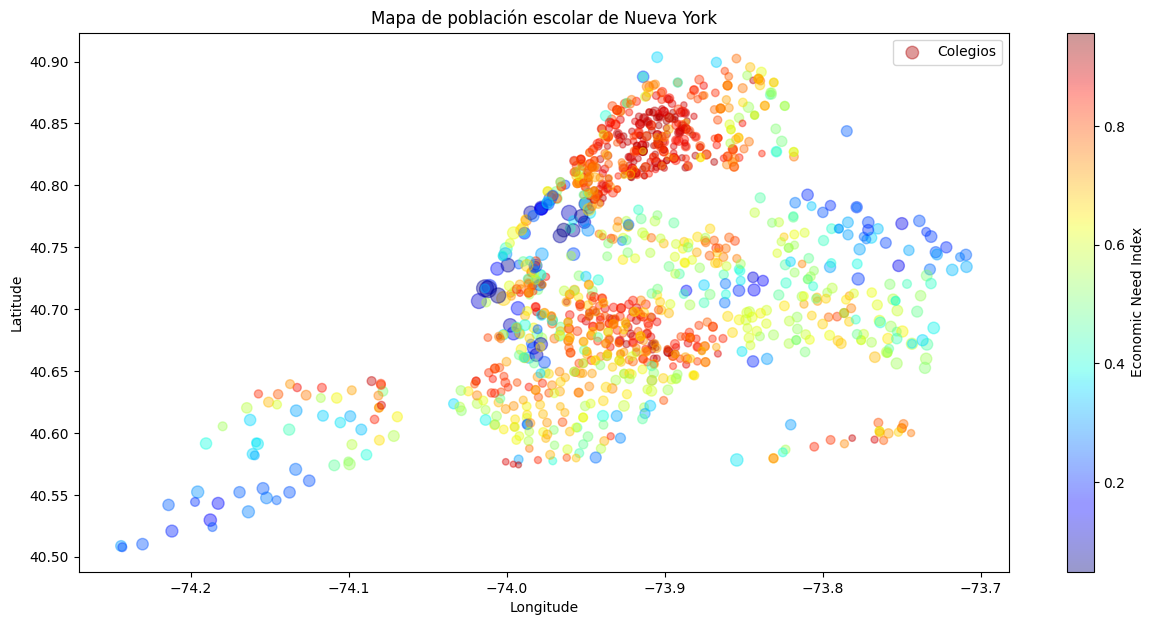

In [19]:
df_schools_col.plot(kind="scatter", x="Longitude", y="Latitude", s=df_schools_col['School Income Estimate']/1210, c="Economic Need Index", 
    cmap=plt.get_cmap("jet"), label='Colegios', title='Mapa de población escolar de Nueva York', colorbar=True, alpha=0.4, figsize=(15,7))
plt.legend()
plt.show()

### Observaciones:

Podemos ver que los colegios con mayor necesidad economica se centran en Brooklyn y Bronx. Tambien llama la atencion que en las zonas donde hay mas necesidad economica es tambien donde se concentran la mayoria de los colegios. En las demas zonas estan bastante dispersos.

3. ¿Cómo se reparten geográficamente los colegios en función de la raza de sus estudiantes? Utiliza gráficas.
    * ¿En qué zonas de NY se encuentran la mayor parte de colegios con estudiantes de raza negra?
    * Lo mismo para raza hispana
    * Raza blanca
    * Asiática

Poblacion negra. Se centran practicamente en Brooklyn y el sur de Queens.
Poblacion blanca. Se centran principalmente en Staten Island pero hay grupos muy pequeños dispersos. 
Poblacion hispana. Se centran en el norte de manhattan y algunos grupos pequeños en Queens y Brooklyn
Poblacion asiatica. Se centran principalmente en Queens . Hay algunos grupos pequeños al sur de Manhattan y este de Brooklyn.

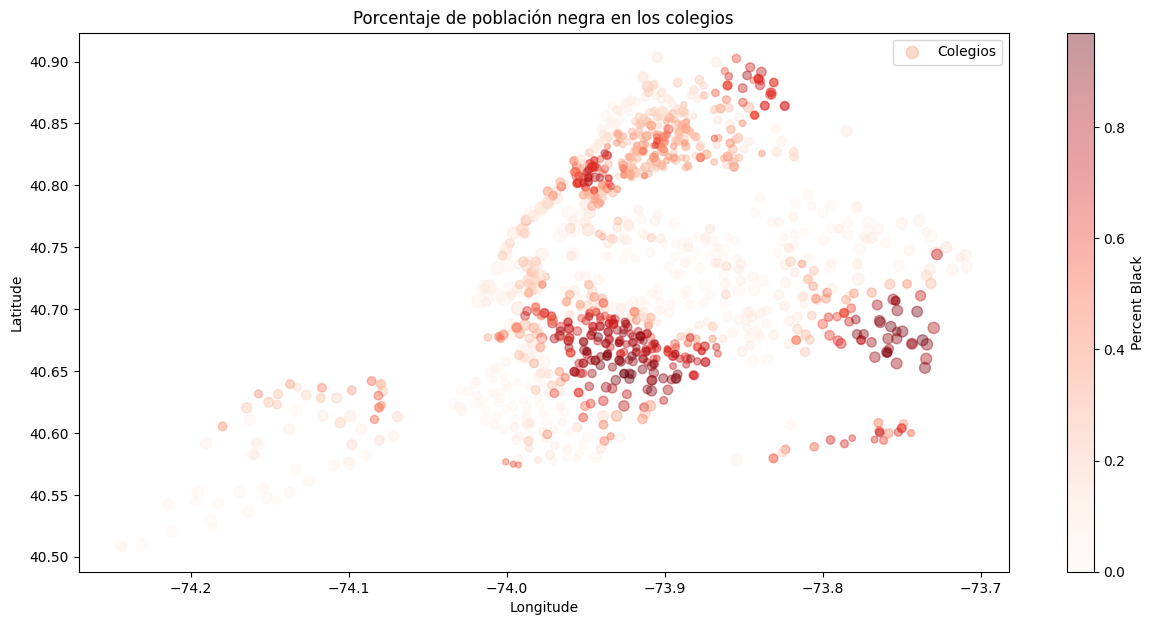

In [446]:
df_schools_col.plot(kind="scatter", x="Longitude", y="Latitude", s=df_schools_col['School Income Estimate']/1272, c="Percent Black", 
    cmap=plt.get_cmap("Reds"), label='Colegios', title='Porcentaje de población negra en los colegios', colorbar=True, alpha=0.4, figsize=(15,7))
plt.legend()
plt.show()


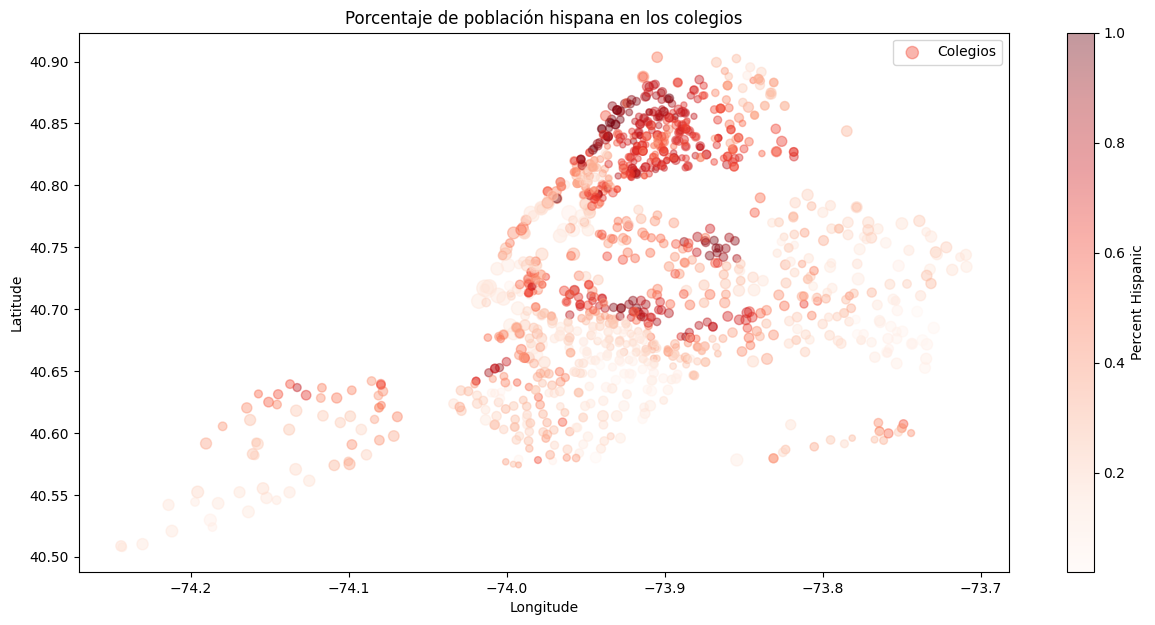

In [344]:
df_schools_col.plot(kind="scatter", x="Longitude", y="Latitude", s=df_schools_col['School Income Estimate']/1272, c="Percent Hispanic", 
    cmap=plt.get_cmap("Reds"), title='Porcentaje de población hispana en los colegios', colorbar=True, alpha=0.4, figsize=(15,7))
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


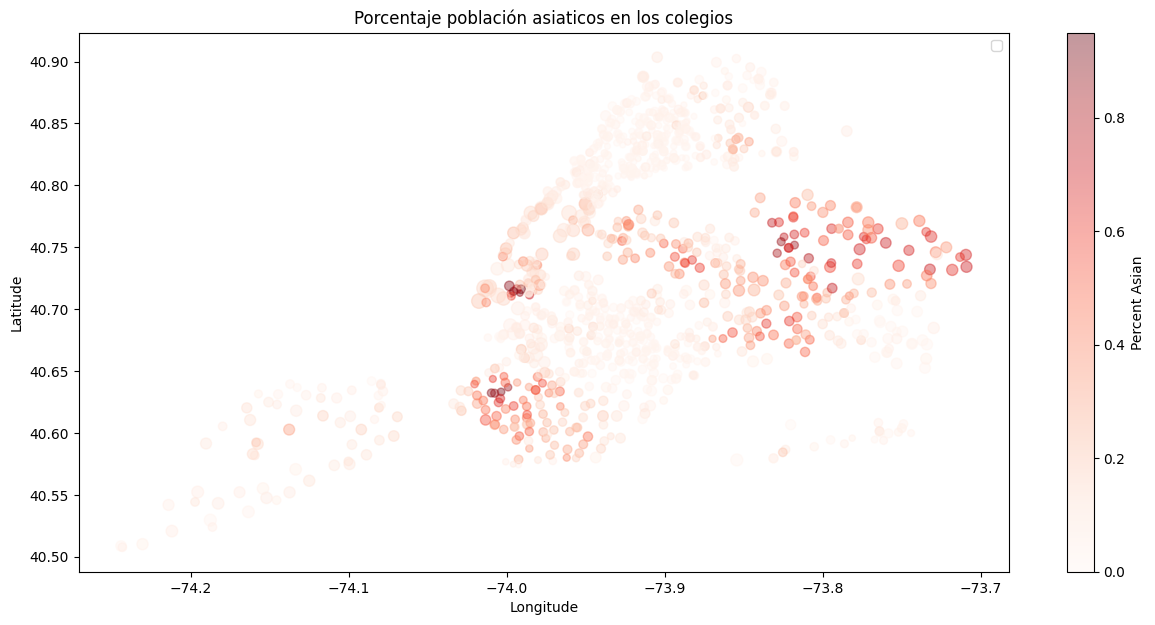

In [346]:
df_schools_col.plot(kind="scatter", x="Longitude", y="Latitude", s=df_schools_col['School Income Estimate']/1272, c="Percent Asian", 
    cmap=plt.get_cmap("Reds"), title='Porcentaje población asiaticos en los colegios', colorbar=True, alpha=0.4, figsize=(15,7))
plt.legend()
plt.show()


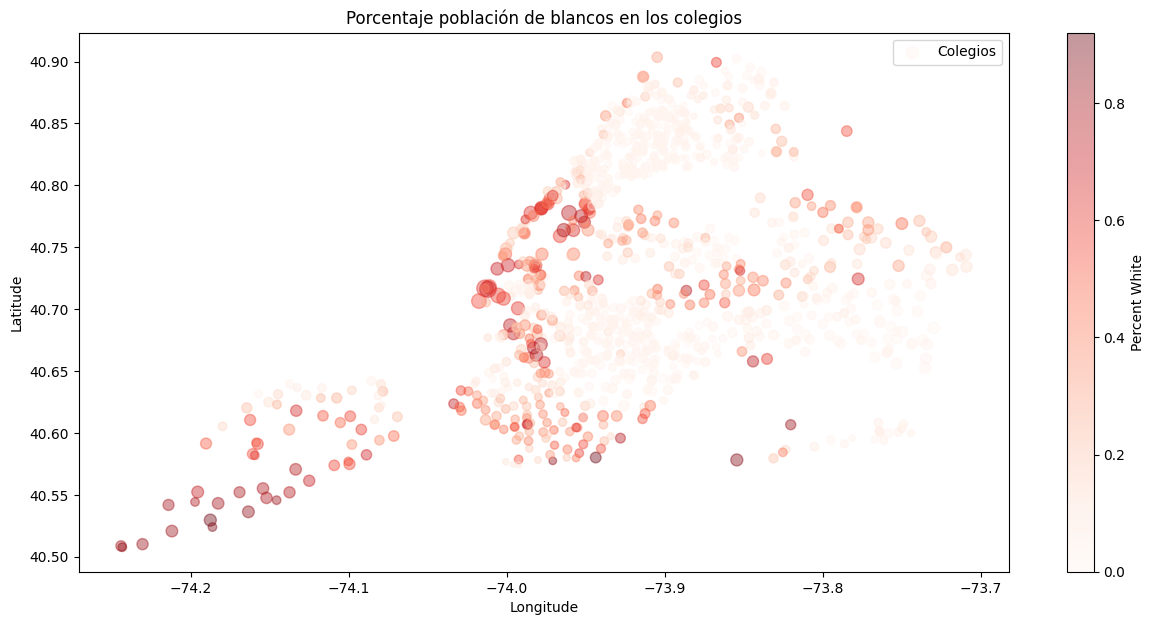

In [347]:
df_schools_col.plot(kind="scatter", x="Longitude", y="Latitude", s=df_schools_col['School Income Estimate']/1272, c="Percent White", 
    cmap=plt.get_cmap("Reds"), label='Colegios', title='Porcentaje población de blancos en los colegios', colorbar=True, alpha=0.4, figsize=(15,7))
plt.legend()
plt.show()

In [329]:
df_schools_col.head()

index Adjusted Grade New? Other Location Code in LCGMS  \
0      0            NaN  NaN                          NaN   
1      1            NaN  NaN                          NaN   
2      2            NaN  NaN                          NaN   
3      3            NaN  NaN                          NaN   
4      4            NaN  NaN                          NaN   

                      School Name      SED Code Location Code  District  \
0       P.S. 015 ROBERTO CLEMENTE  310100010015        01M015         1   
1             P.S. 019 ASHER LEVY  310100010019        01M019         1   
2            P.S. 020 ANNA SILVER  310100010020        01M020         1   
3  P.S. 034 FRANKLIN D. ROOSEVELT  310100010034        01M034         1   
4       THE STAR ACADEMY - P.S.63  310100010063        01M063         1   

    Latitude  Longitude  ... Supportive Environment Rating  \
0  40.721834 -73.978766  ...              Exceeding Target   
1  40.729892 -73.984231  ...                           NaN   
2  40.721274 -73.986315  ...            Approaching Target   
3  40.726147 -73.975043  ...                Meeting Target   
4  40.724404 -73.986360  ...                Meeting Target   

  Effective School Leadership %  Effective School Leadership Rating  \
0                          0.91                    Exceeding Target   
1                          0.90                    Exceeding Target   
2                          0.61                  Not Meeting Target   
3                          0.73                  Approaching Target   
4                          0.81                      Meeting Target   

  Strong Family-Community Ties % Strong Family-Community Ties Rating Trust %  \
0                           0.85                      Meeting Target    0.94   
1                           0.86                      Meeting Target    0.94   
2                           0.80                  Approaching Target    0.79   
3                           0.89                      Meeting Target    0.88   
4                           0.89                      Meeting Target    0.93   

         Trust Rating  Student Achievement Rating  Average ELA Proficiency  \
0    Exceeding Target          Approaching Target                     2.14   
1      Meeting Target            Exceeding Target                     2.63   
2  Not Meeting Target          Approaching Target                     2.39   
3      Meeting Target            Exceeding Target                     2.48   
4      Meeting Target              Meeting Target                     2.38   

  Average Math Proficiency  
0                     2.17  
1                     2.98  
2                     2.54  
3                     2.47  
4                     2.54  

[5 rows x 42 columns]

Observaciones:

4. Analiza las distribuciones de los % de cada raza. ¿Qué raza o razas dirías que predomina en los colegios de NY? Utiliza gráficas

### Observaciones:
#### Segun las graficas se puede ver que la raza blanca y asiatica se centra mucho en ciertos colegios. Eso quiere decir que hay colegios donde un porcentaje muy alto son o blancos o asiaticos. Los hispanos y los negros estan presentes en practicamente todos los colegios y suponen por lo general un porcentaje mayor que los blancos y asiaticos aunque estas dos razas predominen en ciertos colegios.

In [330]:
x1= df_schools_col[["Percent Black"]]
x2 = df_schools_col[["Percent Asian"]]
x3 = df_schools_col[["Percent Hispanic"]]
x4 = df_schools_col[["Percent White"]]

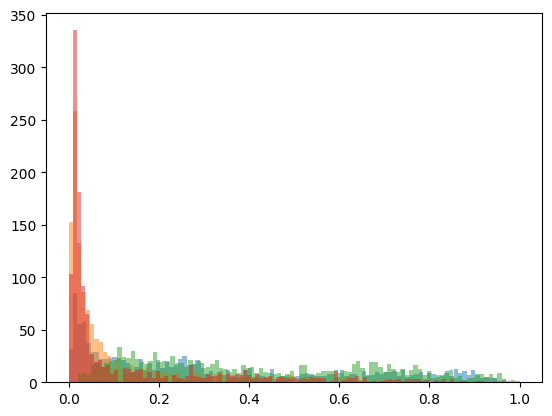

In [332]:


kwargs = dict(alpha = 0.5, bins = 100)

plt.hist(x1, **kwargs) # negros
plt.hist(x2, **kwargs) # asiaticos
plt.hist(x3, **kwargs) # hispanos
plt.hist(x4, **kwargs); # blancos

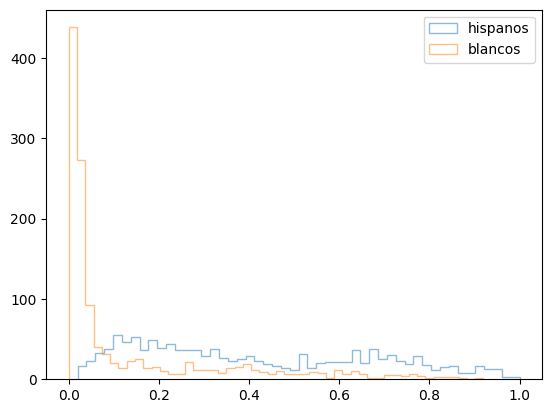

In [337]:
kwargs = dict(alpha = 0.5, bins = 50,histtype= "step")

plt.hist(x3, **kwargs,label="hispanos") # hispanos
plt.hist(x4, **kwargs,label="blancos") # blancos
plt.legend();
# predominan los asiaticos en pocos colegios 

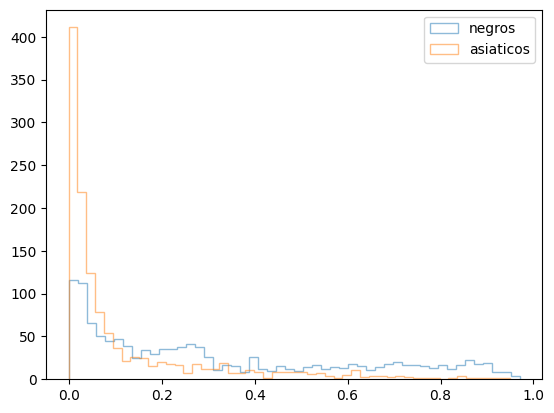

In [72]:
kwargs = dict(alpha = 0.5, bins = 50,histtype= "step")

plt.hist(x1, **kwargs,label="negros") # negros
plt.hist(x2, **kwargs,label="asiaticos") # asiaticos
plt.legend();

Observaciones:

5. ¿Hay alguna relación entre las necesidades económicas de los colegios y la raza de sus estudiantes? ¿Y entre los ingresos y sus razas? Utiliza un mapa de calor con las correlaciones

In [348]:
# DataFrame con las columnas que se van a necesitar

df_correlacion = df_schools_col[['Economic Need Index', 'School Income Estimate', 'Percent Asian', 'Percent Black', 'Percent Hispanic', 'Percent White']]


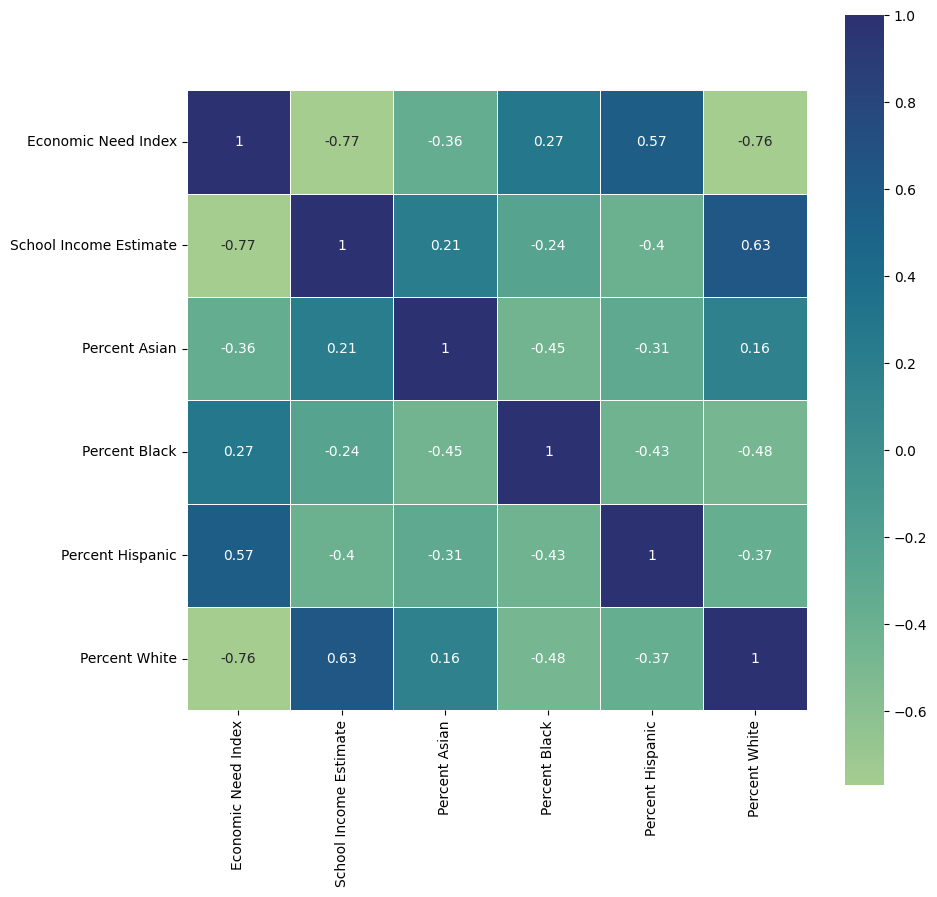

In [349]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_correlacion.corr(), annot=True,cmap="crest", square=True, linewidth=.5);

### Observaciones:
#### En el mapa de calor podemos ver efectivamente que lo que pensabamos se cumple. En cuanto a las necesidades economicas lideran la lista los hispanos seguidos de los negros. Tambien se ve que los blancos apenas tienen necesidades economicas y los asiatico mas de lo mismo. Si nos fijamos en los ingresos estimados vuelve a pasar lo mismo. Los blancos tienen mas ingresos , seguidos de los asiaticos , los hispanos son los que menores ingresos tienen , seguidos de los negros.

6. Analicemos ahora la asistencia a clase. Supongamos que hay colegios con alta tasa de ausencia (>=30%) y baja tasa de asistencia (<=11%). Utiliza gráficas.
    * ¿Dónde se situan los de alta y baja tasa?
    * ¿Qué % mayoritario de razas tienen ambos grupos?
    * Necesidades económicas y estimación de ingresos de esos colegios.

### Observaciones:
#### Podemos ver que los colegios con alta tasa de ausencia y baja tasa de asistencia se centran en el norte y oeste ( Manhattan y Bronx). Coincide con donde predomina la poblacion negra e hispana. Tambien la poblacion negra e hispana son los que mas faltan a clase. Los que menos faltan son los asiaticos seguidos de los blancos. Tambien podemos decir estos mismos colegios son los que tienen menos ingresos y mayor necesidad economica. 

In [350]:
df_ausencia=df_schools_col[["School Name","Student Attendance Rate","Percent of Students Chronically Absent","Economic Need Index","School Income Estimate","Percent Asian", "Percent Black", "Percent Hispanic", "Percent White"]]

df_ausencia.head()

School Name  Student Attendance Rate  \
0       P.S. 015 ROBERTO CLEMENTE                     0.94   
1             P.S. 019 ASHER LEVY                     0.92   
2            P.S. 020 ANNA SILVER                     0.94   
3  P.S. 034 FRANKLIN D. ROOSEVELT                     0.92   
4       THE STAR ACADEMY - P.S.63                     0.93   

   Percent of Students Chronically Absent  Economic Need Index  \
0                                    0.18                0.919   
1                                    0.30                0.641   
2                                    0.20                0.744   
3                                    0.28                0.860   
4                                    0.23                0.730   

   School Income Estimate  Percent Asian  Percent Black  Percent Hispanic  \
0                31141.72           0.05           0.32              0.60   
1                56462.88           0.10           0.20              0.63   
2                44342.61           0.35           0.08              0.49   
3                31454.00           0.05           0.29              0.63   
4                46435.59           0.04           0.20              0.65   

   Percent White  
0           0.01  
1           0.06  
2           0.04  
3           0.04  
4           0.10

In [359]:

df_baja_ausencia= df_ausencia["School Name"][(df_ausencia["Student Attendance Rate"] <=0.11)]
len(df_baja_ausencia)

10

In [361]:
df_schools_faltas = df_schools_col[(df_schools_col['Percent of Students Chronically Absent'] >= 0.3) & (df_schools_col['Student Attendance Rate'] <= 0.11)]
df_schools_razas = df_schools_faltas[['Percent Asian', 'Percent Black', 'Percent Hispanic', 'Percent Black / Hispanic', 'Percent White']].mean()

In [360]:
# la media de ausencia a clase por raza
df_schools_razas

Percent Asian               0.019
Percent Black               0.614
Percent Hispanic            0.287
Percent Black / Hispanic    0.902
Percent White               0.055
dtype: float64

In [351]:
# ALTA TASA DE AUSENCIA Y BAJA TASA DE ASISTENCIA

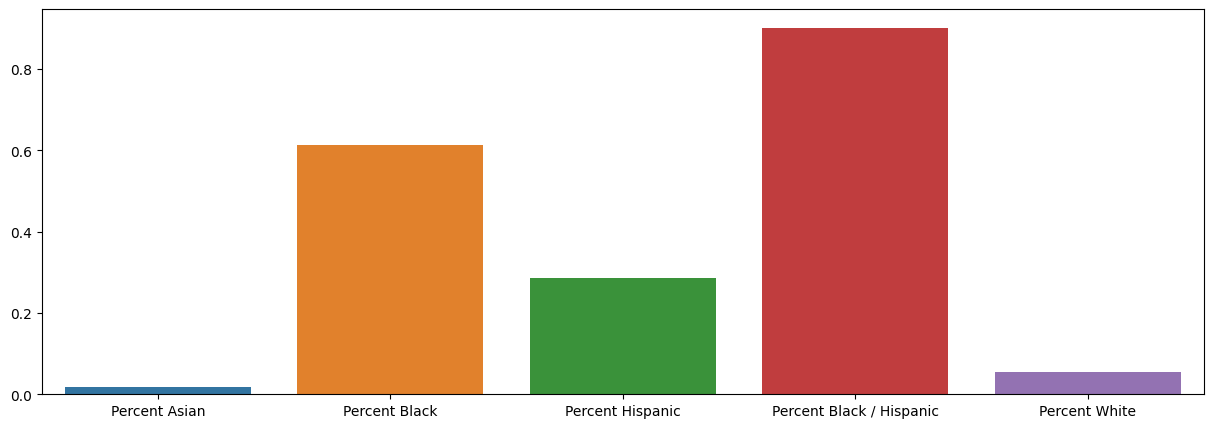

In [353]:
# aqui se muestra el porcentaje de razas juntando por ambos grupos de asistencia y ausencia

plt.figure(figsize=(15,5))
sns.barplot(x=df_schools_razas.index,
            y=df_schools_razas.values,
            ci=None);

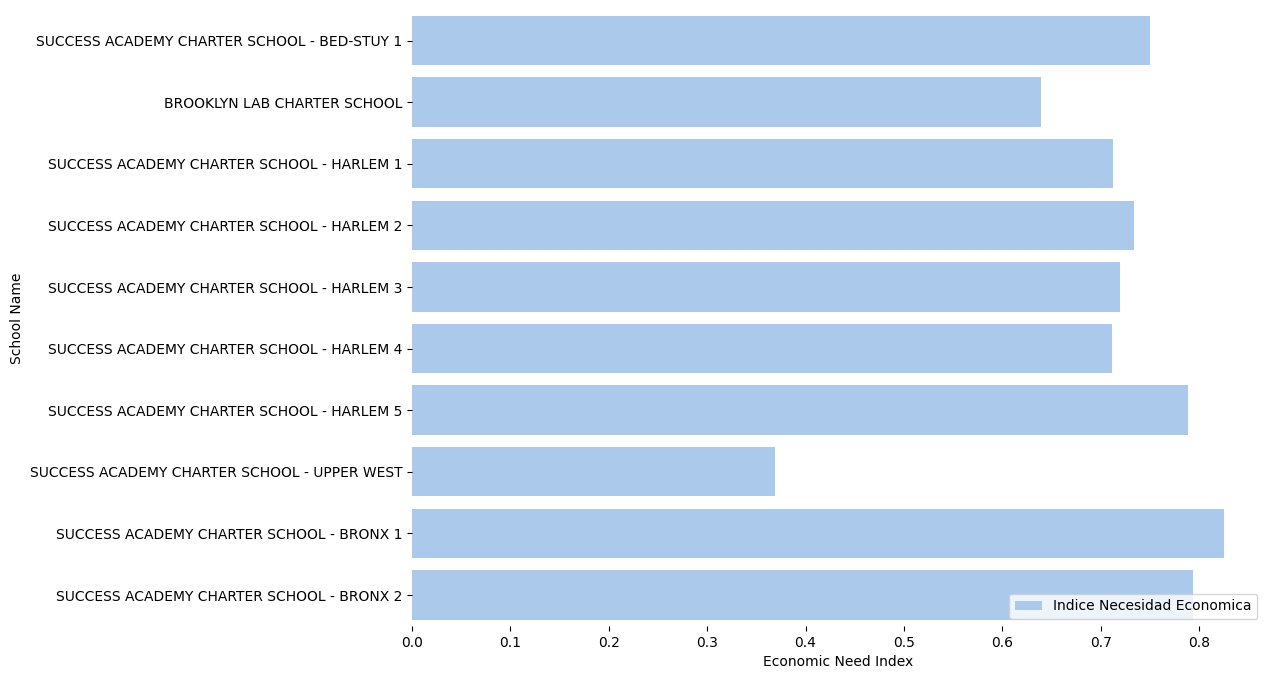

In [388]:
f, ax = plt.subplots(figsize=(11, 8))

sns.set_color_codes("pastel")
sns.barplot(x="Economic Need Index", y="School Name", data=df_schools_faltas,
            label="Indice Necesidad Economica", color="b", ci=None)


ax.legend(ncol=1, loc="lower right", frameon=True)
#ax.set(xlim=(0, 300), ylabel="Colegios", title='',xlabel="Numero de registros")
sns.despine(left=True, bottom=True)

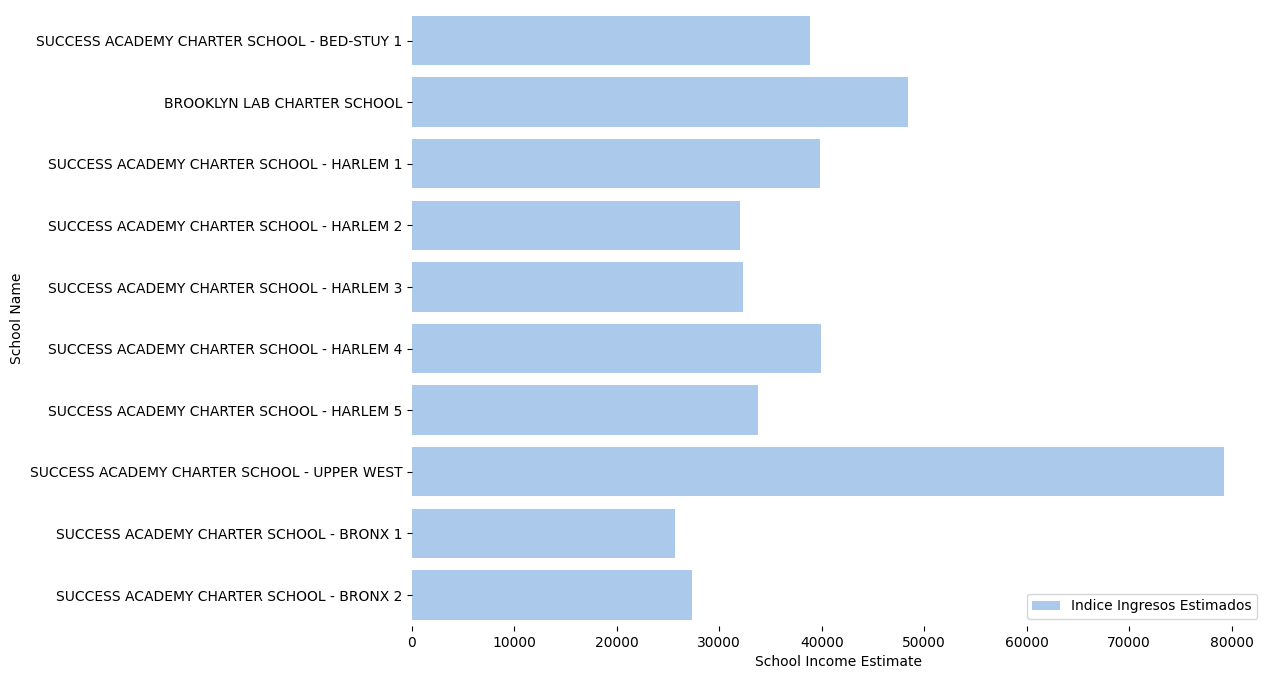

In [389]:
f, ax = plt.subplots(figsize=(11, 8))

sns.set_color_codes("pastel")
sns.barplot(x="School Income Estimate", y="School Name", data=df_schools_faltas,
            label="Indice Ingresos Estimados", color="b", ci=None)


ax.legend(ncol=1, loc="lower right", frameon=True)
#ax.set(xlim=(0, 300), ylabel="Colegios", title='',xlabel="Numero de registros")
sns.despine(left=True, bottom=True)

In [367]:
df_schools_ausencia_alta = df_schools_col["Percent of Students Chronically Absent"] >= 0.3
df_schools_asistencia_baja = df_schools_col["Student Attendance Rate"] <=0.11
df_schools_ausencia_total = df_schools_col[(df_schools_ausencia_alta & df_schools_asistencia_baja)]

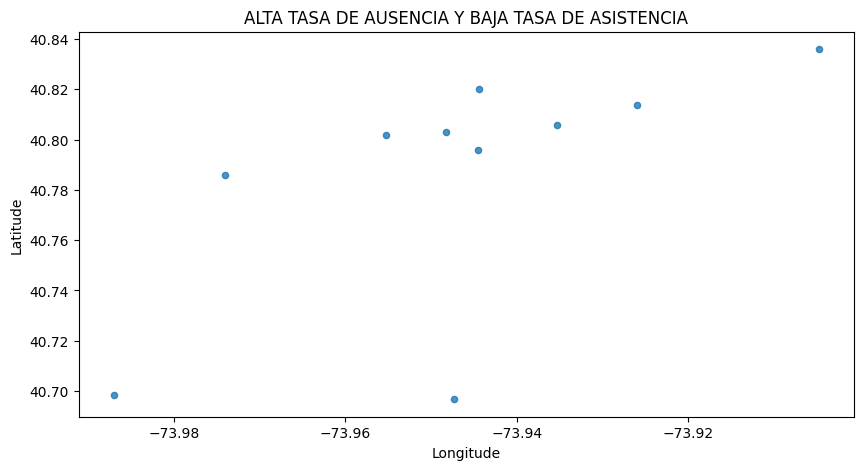

In [390]:
# donde se situan los colegios 

df_schools_ausencia_total.plot(kind="scatter", 
                    x="Longitude", 
                    y="Latitude", 
                    cmap=plt.get_cmap("jet"), 
                    title='ALTA TASA DE AUSENCIA Y BAJA TASA DE ASISTENCIA', 
                    alpha=0.8, 
                    figsize=(10,5)
                    );

Observaciones:

7. Vamos a analizar el rendimiento académico de los alumnos. Para ello, tendremos que dividir el dataset en colegios donde predominan latinos y negros (>= 70%) vs predominio de asiáticos y blancos. Saca algunos estadísticos y compara en una gráfica las funciones de densidad de ambos grupos, para los scores de matemáticas y ELA (English Language Arts). Utiliza gráficas.

### Observaciones:
#### Filtrando los colegios por porcentaje de latinos y negros donde el porcentaje es superior al 70 % y lo mismo aplicado a los asiaticos y blancos podemos ver que la media en cuanto al nivel de matematicas y de lengua es muy distinta en cuanto a un grupo y el otro. La comunidad de hispanos y negros esta por debajo de la media de asiaticos y blancos.

In [370]:
df_schools_col[['Percent Black', 'Percent Hispanic', 'Percent Black / Hispanic']]

Percent Black  Percent Hispanic  Percent Black / Hispanic
0              0.32              0.60                      0.92
1              0.20              0.63                      0.83
2              0.08              0.49                      0.57
3              0.29              0.63                      0.92
4              0.20              0.65                      0.84
...             ...               ...                       ...
1267           0.20              0.77                      0.97
1268           0.68              0.31                      0.98
1269           0.54              0.45                      0.99
1270           0.86              0.09                      0.95
1271           0.28              0.67                      0.96

[1272 rows x 3 columns]

In [391]:
# se crea columna nueva con la suma de porcentaje asiatico y blanco
df_schools_col['Percent Asian / White'] = df_schools_col['Percent Asian'] + df_schools_col['Percent White']

In [392]:
df_schools_h_b = df_schools_col[df_schools_col['Percent Black / Hispanic'] >= 0.7]


In [393]:
df_schools_a_w = df_schools_col[df_schools_col['Percent Asian / White'] >= 0.7]

Observaciones:

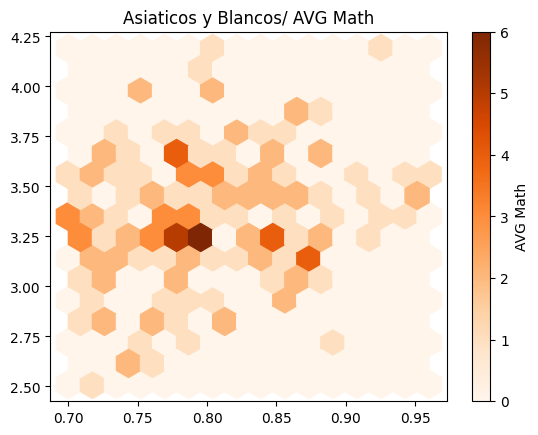

In [457]:
plt.hexbin(df_schools_a_w['Percent Asian / White'],df_schools_a_w['Average Math Proficiency'] , gridsize = 15, cmap = 'Oranges')
cb = plt.colorbar(label='AVG Math')
plt.title("Asiaticos y Blancos/ AVG Math");

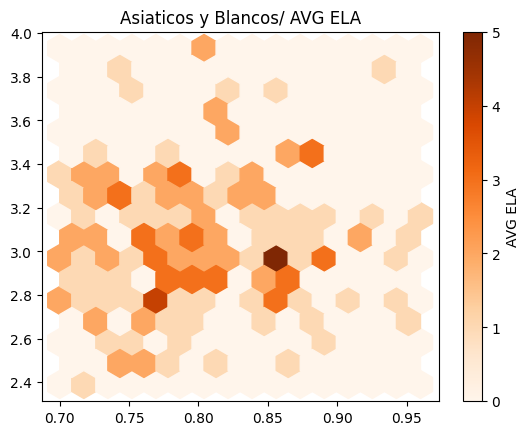

In [458]:
plt.hexbin(df_schools_a_w['Percent Asian / White'],df_schools_a_w['Average ELA Proficiency'] , gridsize = 15, cmap = 'Oranges')
cb = plt.colorbar(label='AVG ELA')
plt.title("Asiaticos y Blancos/ AVG ELA");

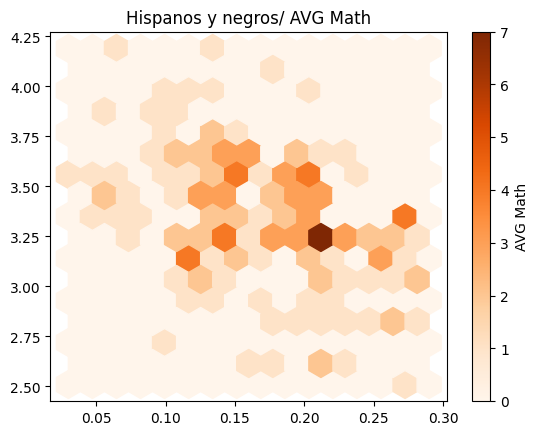

In [459]:
plt.hexbin(df_schools_a_w['Percent Black / Hispanic'],df_schools_a_w['Average Math Proficiency'] , gridsize = 15, cmap = 'Oranges')
cb = plt.colorbar(label='AVG Math')
plt.title("Hispanos y negros/ AVG Math");

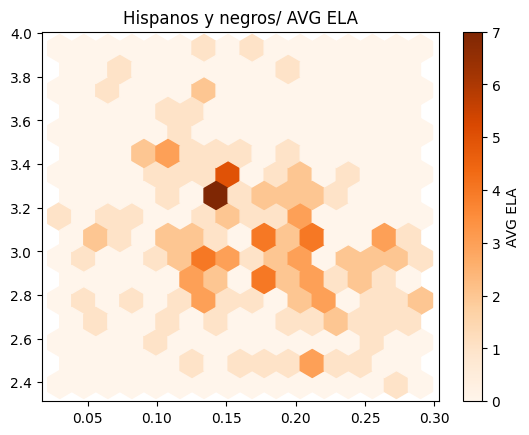

In [460]:
plt.hexbin(df_schools_a_w['Percent Black / Hispanic'],df_schools_a_w['Average ELA Proficiency'] , gridsize = 15, cmap = 'Oranges')
cb = plt.colorbar(label='AVG ELA')
plt.title("Hispanos y negros/ AVG ELA");

8. Comprobaremos ahora la influencia de que un colegio pertenezca o no a una comunidad
    * ¿En qué afecta que el colegio pertenezca a una comunidad? Raza, necesidades económicas, ingresos...
    * Compara mediante funciones de densidad si los colegios comunitarios tienen mayores ingresos.
    * Compara mediante funciones de densidad si los colegios comunitarios tienen mayores necesidades económicas.

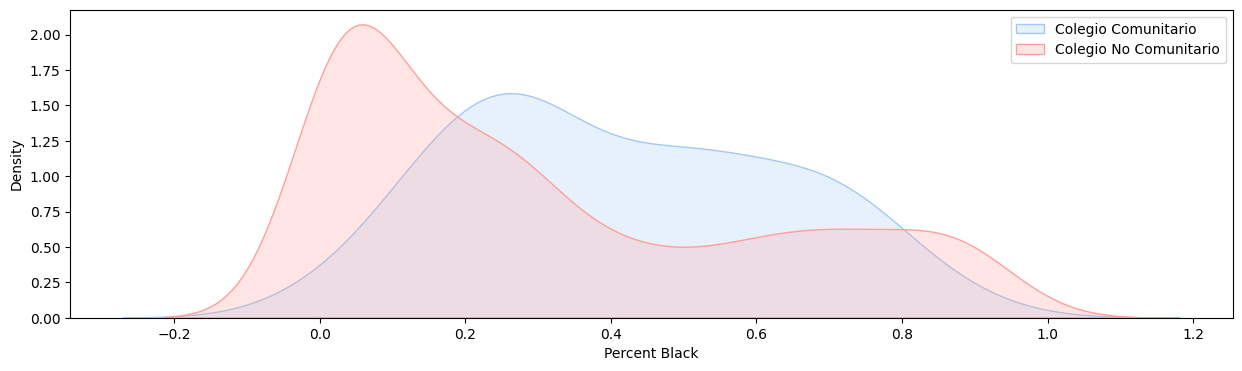

In [423]:
plt.figure(figsize=(15,4))

sns.kdeplot(df_schools_col.loc[(df_schools_col['Community School?'] == 'Yes'),'Percent Black'] , color='b', shade=True, label='Colegio Comunitario') # linea azul

sns.kdeplot(df_schools_col.loc[(df_schools_col['Community School?'] == 'No'),'Percent Black'] , color='r', shade=True, label='Colegio No Comunitario'); # linea roja
plt.legend();

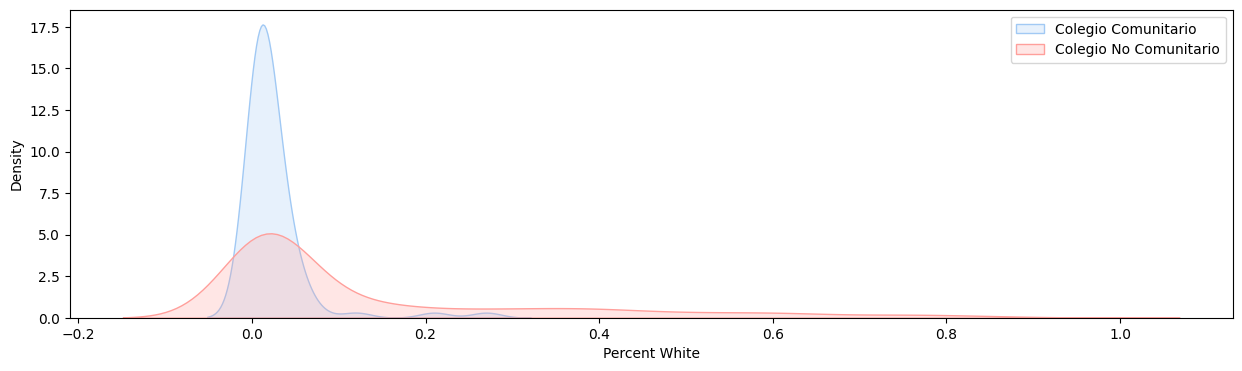

In [424]:
plt.figure(figsize=(15,4))

sns.kdeplot(df_schools_col.loc[(df_schools_col['Community School?'] == 'Yes'),'Percent White'] , color='b', shade=True, label='Colegio Comunitario') # linea azul

sns.kdeplot(df_schools_col.loc[(df_schools_col['Community School?'] == 'No'),'Percent White'] , color='r', shade=True, label='Colegio No Comunitario'); # linea roja
plt.legend();

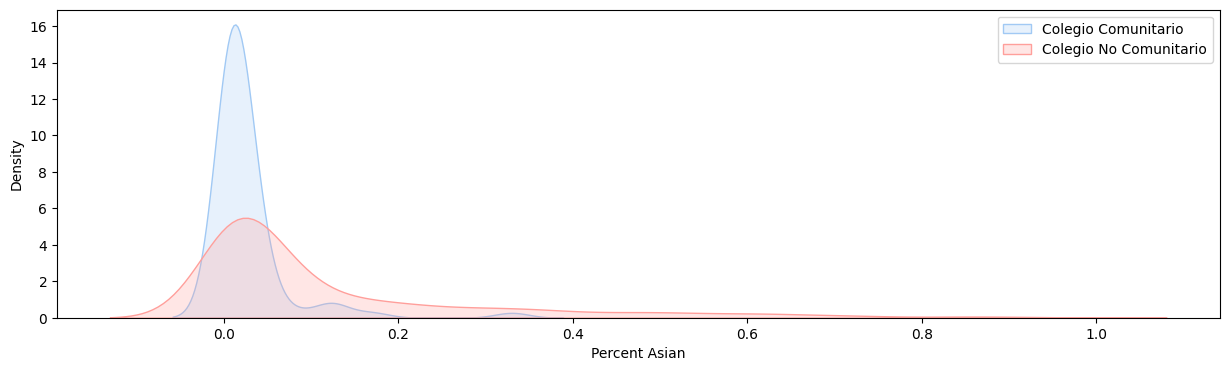

In [425]:
plt.figure(figsize=(15,4))

sns.kdeplot(df_schools_col.loc[(df_schools_col['Community School?'] == 'Yes'),'Percent Asian'] , color='b', shade=True, label='Colegio Comunitario') # linea azul

sns.kdeplot(df_schools_col.loc[(df_schools_col['Community School?'] == 'No'),'Percent Asian'] , color='r', shade=True, label='Colegio No Comunitario'); # linea roja
plt.legend();

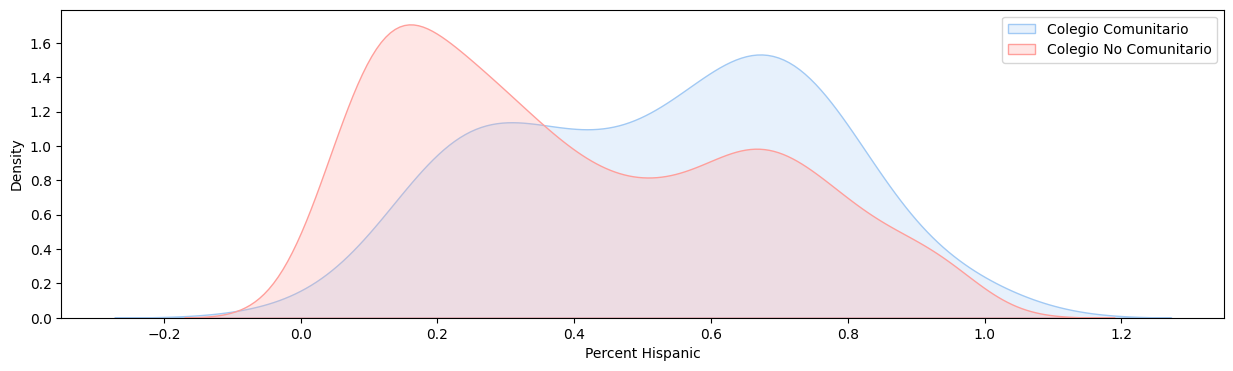

In [426]:
plt.figure(figsize=(15,4))

sns.kdeplot(df_schools_col.loc[(df_schools_col['Community School?'] == 'Yes'),'Percent Hispanic'] , color='b', shade=True, label='Colegio Comunitario') # linea azul

sns.kdeplot(df_schools_col.loc[(df_schools_col['Community School?'] == 'No'),'Percent Hispanic'] , color='r', shade=True, label='Colegio No Comunitario'); # linea roja
plt.legend();

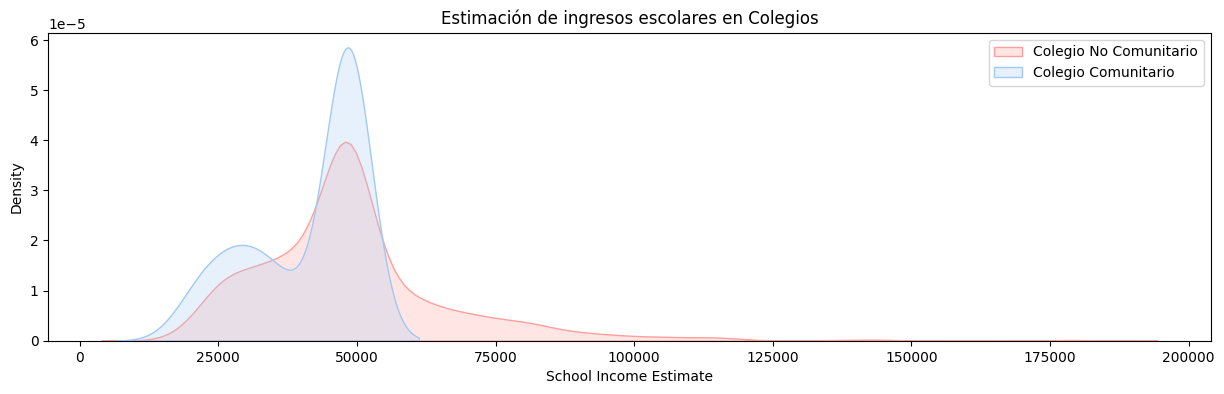

In [422]:
# punto 2
plt.figure(figsize=(15,4))

sns.kdeplot(df_schools_col.loc[(df_schools_col['Community School?'] == 'No'),'School Income Estimate'] , color='r', shade=True, label='Colegio No Comunitario')

sns.kdeplot(df_schools_col.loc[(df_schools_col['Community School?'] == 'Yes'),'School Income Estimate'] , color='b', shade=True, label='Colegio Comunitario')
plt.title('Estimación de ingresos escolares en Colegios')
plt.legend();

In [413]:
# Economic Need Index

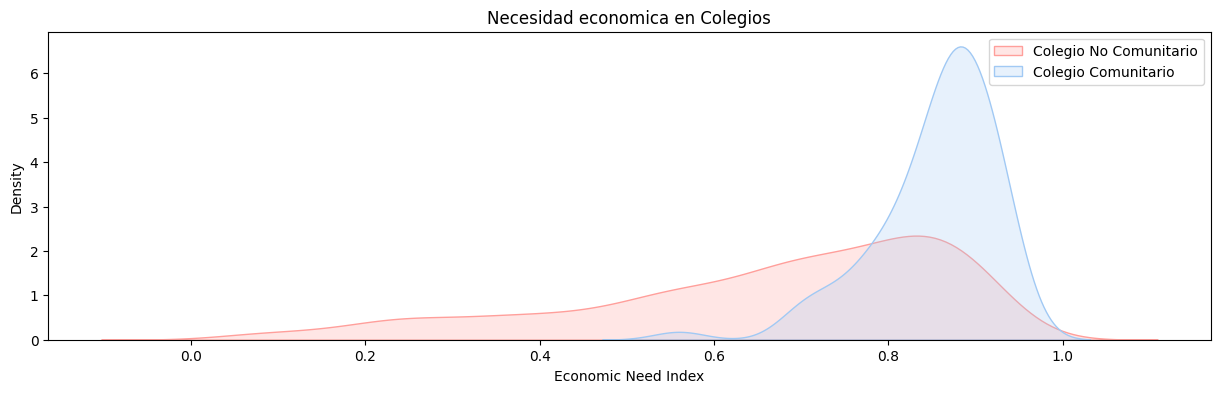

In [421]:
# punto 3
plt.figure(figsize=(15,4))

sns.kdeplot(df_schools_col.loc[(df_schools_col['Community School?'] == 'No'),'Economic Need Index'] , color='r', shade=True, label='Colegio No Comunitario')

sns.kdeplot(df_schools_col.loc[(df_schools_col['Community School?'] == 'Yes'),'Economic Need Index'] , color='b', shade=True, label='Colegio Comunitario')
plt.legend()
plt.title('Necesidad economica en Colegios');

Observaciones:

9. Escoge a las top 10 ciudades con más colegios. Muestra la dispersión de los ingresos estimados de los colegios de cada ciudad con diagramas de caja.
    * Cual es la ciudad con mayor y menor dispersión?
    * En qué ciudades se encuentran que la mitad de los colegios tienen un mínimo de ingresos de 50000.

In [433]:
df_schools_top_10 = list(df_schools_col.groupby('City')['index'].count().sort_values(ascending=False).head(10).index)
schools_top_10 = df_schools_col[df_schools_col['City'].isin(df_schools_top_10)]

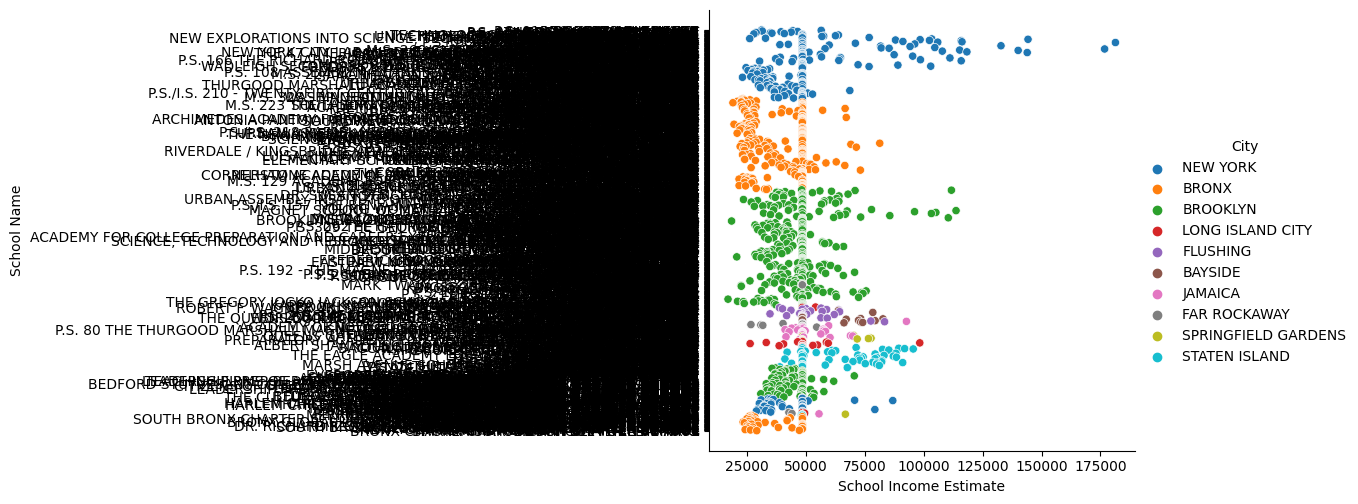

In [434]:
sns.relplot(x = "School Income Estimate", y = "School Name", hue = "City", data = schools_top_10, kind="scatter");

In [437]:
p_0 = np.percentile(schools_top_10["School Income Estimate"], 0) 
p_25 = np.percentile(schools_top_10["School Income Estimate"], 25) 
p_50 = np.percentile(schools_top_10["School Income Estimate"], 50)
p_75 = np.percentile(schools_top_10["School Income Estimate"], 75) 
p_100 = np.percentile(schools_top_10["School Income Estimate"], 100)

In [438]:
print("Valor del percentil 0:", p_0)
print("Valor del percentil 25:", p_25)
print("Valor del percentil 50:", p_50)
print("Valor del percentil 75:", p_75)
print("Valor del percentil 100:", p_100)

Valor del percentil 0: 16901.67
Valor del percentil 25: 36066.3525
Valor del percentil 50: 48443.12849315069
Valor del percentil 75: 48443.12849315069
Valor del percentil 100: 181382.06


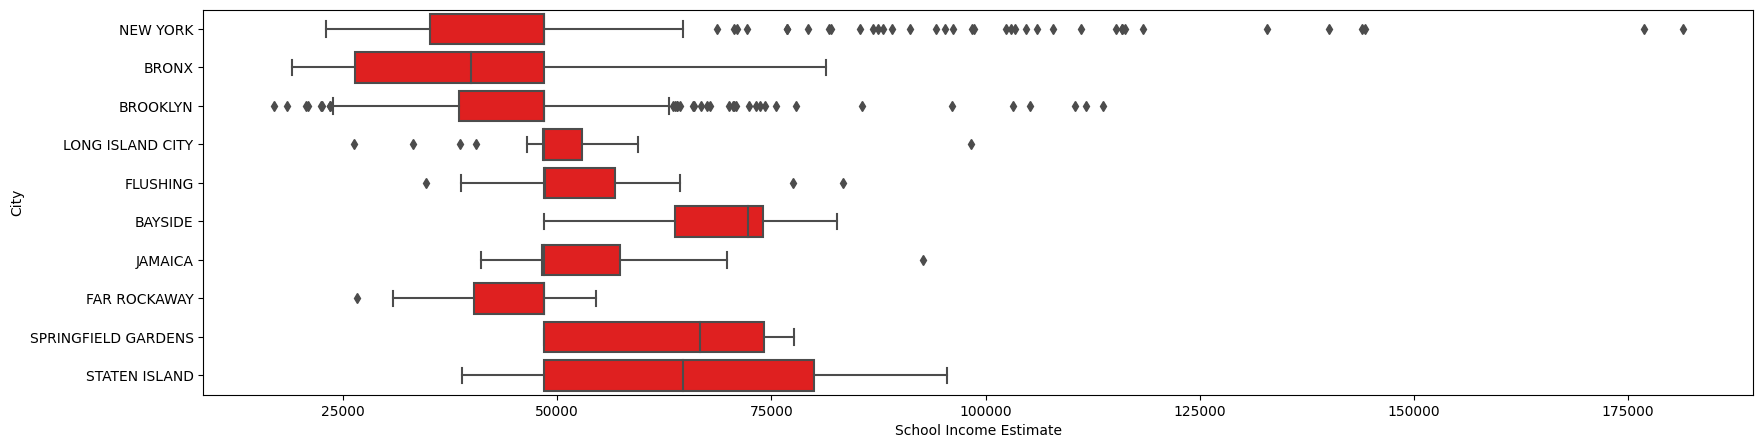

In [442]:
plt.figure(figsize=(20,5))
sns.boxplot(x=schools_top_10["School Income Estimate"], y = schools_top_10["City"], color="red");

### Se puede decir que la ciudad con mayor dispersion es Nueva York seguido de Brooklyn. Y las ciudades con menor dispersion son Far Rockway y Springfield Gardens. La media esta en 48.400

Observaciones:

10. Utilizando el dataset "D5 SHSAT Registrations and Testers.csv", ¿qué colegios registran más estudiantes en el examen? Existen diferencias con los colegios donde más estudiantes realmente se presentan? Utiliza gráficas.

In [266]:
registrations_top = list(df_registrations.groupby('School name')['Number of students who registered for the SHSAT'].count().sort_values(ascending=False).head(10).index)
registrations_top

['Frederick Douglass Academy',
 'Thurgood Marshall Academy for Learning and Social Change',
 'Columbia Secondary School',
 'Democracy Prep Charter School',
 'Democracy Prep Harlem Charter School',
 "Harlem Children's Zone Promise Academy II Charter School",
 "Harlem Children's Zone Promise Academy 1 Charter School",
 'Harlem Village Academy Charter School',
 'KIPP Infinity Charter School',
 'Democracy Prep Endurance Charter School']

In [443]:
# se agrupan los colegios por el DBN para tener en cuanta el total de registros para el SHSAT
df_regs = df_registrations.groupby(['DBN','School name'], as_index=False).sum()
df_regs.head()

DBN                                    School name  Year of SHST  \
0  05M046                         P.S. 046 Arthur Tappan          8058   
1  05M123                       P.S. 123 Mahalia Jackson          8058   
2  05M129                        P.S. 129 John H. Finley          8058   
3  05M148          Eagle Academy for Young Men of Harlem          6047   
4  05M157  The Urban Assembly School for Global Commerce          8058   

   Grade level  Enrollment on 10/31  \
0           32                  315   
1           32                  241   
2           32                  252   
3           25                  222   
4           36                  309   

   Number of students who registered for the SHSAT  \
0                                               98   
1                                               84   
2                                              108   
3                                               12   
4                                                7   

   Number of students who took the SHSAT  
0                                     39  
1                                     37  
2                                     48  
3                                     11  
4                                      3

In [444]:
# se ordenan las escuelas en funcion del numero de registros de mayor a menor
registered_SHSAT= df_regs.sort_values('Number of students who registered for the SHSAT',ascending=False)
registered_SHSAT.head(5)

DBN                              School name  Year of SHST  \
22  84M336             KIPP Infinity Charter School         12087   
29  84M726    KIPP STAR College Prep Charter School          8058   
10  05M362                Columbia Secondary School         16116   
20  84M065  Democracy Prep Endurance Charter School         10076   
24  84M350            Democracy Prep Charter School         16116   

    Grade level  Enrollment on 10/31  \
22           50                  494   
29           32                  292   
10           68                  794   
20           42                  567   
24           68                  943   

    Number of students who registered for the SHSAT  \
22                                              296   
29                                              292   
10                                              253   
20                                              194   
24                                              145   

    Number of students who took the SHSAT  
22                                     65  
29                                     96  
10                                    179  
20                                     94  
24                                    100

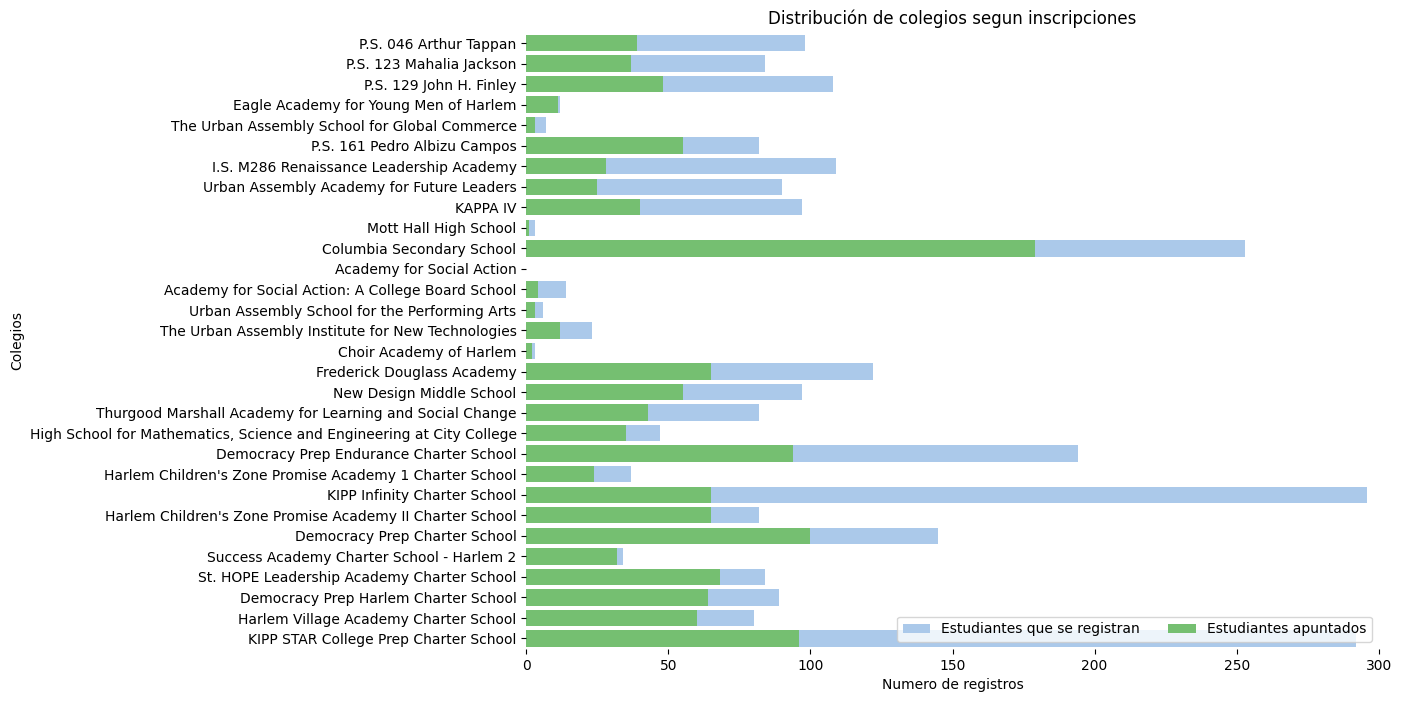

In [461]:
f, ax = plt.subplots(figsize=(11, 8))

sns.set_color_codes("pastel")
sns.barplot(x="Number of students who registered for the SHSAT", y="School name", data=df_regs,
            label="Estudiantes que se registran", color="b", ci=None)

sns.set_color_codes("muted")
sns.barplot(x="Number of students who took the SHSAT", y="School name", data=df_regs,
            label="Estudiantes apuntados", color="g", ci=None)

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 300), ylabel="Colegios", title='Distribución de colegios segun inscripciones',
       xlabel="Numero de registros")
sns.despine(left=True, bottom=True)

In [282]:
# se ordenan las escuelas en funcion del numero de alumnos que se han apuntado al SHSAT despues de registrarse.
took_SHSAT= df_regs.sort_values('Number of students who took the SHSAT',ascending=False)
took_SHSAT.head(5)

DBN                                 School name  Year of SHST  \
10  05M362                   Columbia Secondary School         16116   
24  84M350               Democracy Prep Charter School         16116   
29  84M726       KIPP STAR College Prep Charter School          8058   
20  84M065     Democracy Prep Endurance Charter School         10076   
26  84M388  St. HOPE Leadership Academy Charter School          8058   

    Grade level  Enrollment on 10/31  \
10           68                  794   
24           68                  943   
29           32                  292   
20           42                  567   
26           32                  305   

    Number of students who registered for the SHSAT  \
10                                              253   
24                                              145   
29                                              292   
20                                              194   
26                                               84   

    Number of students who took the SHSAT  
10                                    179  
24                                    100  
29                                     96  
20                                     94  
26                                     68

In [289]:
# ordenamos las escuelas segun mayor porcentaje de alumnos que despues de registrarse se apuntaron al SHSAT 
Porcentaje_took= df_regs.sort_values('Porcentaje inscritos',ascending=True)
Porcentaje_took.head(5)  

DBN                                        School name  Year of SHST  \
22  84M336                       KIPP Infinity Charter School         12087   
6   05M286           I.S. M286 Renaissance Leadership Academy          6042   
7   05M286          Urban Assembly Academy for Future Leaders          2016   
12  05M367  Academy for Social Action: A College Board School         10069   
29  84M726              KIPP STAR College Prep Charter School          8058   

    Grade level  Enrollment on 10/31  \
22           50                  494   
6            24                  165   
7             8                   93   
12           43                  254   
29           32                  292   

    Number of students who registered for the SHSAT  \
22                                              296   
6                                               109   
7                                                90   
12                                               14   
29                                              292   

    Number of students who took the SHSAT  Porcentaje inscritos  
22                                     65              0.219595  
6                                      28              0.256881  
7                                      25              0.277778  
12                                      4              0.285714  
29                                     96              0.328767

#### Los colegios que mas alumnos registran en el examen son KIPP Infinity Charter School	y KIPP STAR College Prep Charter School. Estos dos son lo que tienen practicamente el mismo numero de estudiantes con diferencia de solo 4 alumnos. El tercero es Columbia Secondary School y se aleja con una diferencia de 39 alumnos respecto al anterior. Sin embargo si ordenamos los colegios por el numero de alumnos que se apuntan, el tercer colegio pasa a ser el primero. 


#### Si tenemos en cuenta el porcentaje de los alumnos respecto al numero de registros y numero de alumnos que se acaban apuntando las escuelas mencionadas anteriormente dejan de estar en las primeras filas. El mayor porcentaje lo tiene Success Academy Charter School - Harlem 2 con un 94% de alumnos que se apuntan despues de registrarse. En el ultimo puesto tenemos a KIPP Infinity Charter School	con un 21,95 % de alumnos que se puntan despues de registrarse . Esta escuela es la misma que era la primera en numero de alumnos que se registraban.

In [284]:
# se crea una columna nueva con el porcentaje de alumnos que se acaban inscribiendo.
df_regs["Porcentaje inscritos"]= df_regs["Number of students who took the SHSAT"] / df_regs["Number of students who registered for the SHSAT"]

In [286]:
df_regs.head()

DBN                                    School name  Year of SHST  \
0  05M046                         P.S. 046 Arthur Tappan          8058   
1  05M123                       P.S. 123 Mahalia Jackson          8058   
2  05M129                        P.S. 129 John H. Finley          8058   
3  05M148          Eagle Academy for Young Men of Harlem          6047   
4  05M157  The Urban Assembly School for Global Commerce          8058   

   Grade level  Enrollment on 10/31  \
0           32                  315   
1           32                  241   
2           32                  252   
3           25                  222   
4           36                  309   

   Number of students who registered for the SHSAT  \
0                                               98   
1                                               84   
2                                              108   
3                                               12   
4                                                7   

   Number of students who took the SHSAT  Porcentaje inscritos  
0                                     39              0.397959  
1                                     37              0.440476  
2                                     48              0.444444  
3                                     11              0.916667  
4                                      3              0.428571

In [263]:
df_registrations


DBN                            School name  Year of SHST  Grade level  \
0    05M046                 P.S. 046 Arthur Tappan          2013            8   
1    05M046                 P.S. 046 Arthur Tappan          2014            8   
2    05M046                 P.S. 046 Arthur Tappan          2015            8   
3    05M046                 P.S. 046 Arthur Tappan          2016            8   
4    05M123               P.S. 123 Mahalia Jackson          2013            8   
..      ...                                    ...           ...          ...   
135  84M709  Harlem Village Academy Charter School          2016            9   
136  84M726  KIPP STAR College Prep Charter School          2013            8   
137  84M726  KIPP STAR College Prep Charter School          2014            8   
138  84M726  KIPP STAR College Prep Charter School          2015            8   
139  84M726  KIPP STAR College Prep Charter School          2016            8   

     Enrollment on 10/31  Number of students who registered for the SHSAT  \
0                     91                                               31   
1                     95                                               26   
2                     73                                               21   
3                     56                                               20   
4                     62                                               31   
..                   ...                                              ...   
135                   42                                                1   
136                   75                                               74   
137                   71                                               74   
138                   84                                               84   
139                   62                                               60   

     Number of students who took the SHSAT  
0                                       14  
1                                        7  
2                                       10  
3                                        8  
4                                       14  
..                                     ...  
135                                      1  
136                                     29  
137                                     19  
138                                     29  
139                                     19  

[140 rows x 7 columns]

Observaciones:

11. Escribe en un README.md las conclusiones finales del análisis:
    * Contexto del análisis y pasos realizados.
    * Validación de las hipótesis.
    * Futuros pasos.



12. Crea una presentación donde resumas el trabajo realizado del EDA en un power point o herramienta similar. El lunes 23 realizarás una presentación a los profesores por google meet a las 16.00.

13. Sube tu trabajo a un repositorio de github:
    * Este jupyter con los apartados resueltos.
    * El README.md
    * Todos los recursos necesarios para el EDA: ficheros, scripts, notebooks, imagenes,... 
    * La presentación

14. Sube al classroom el repositorio. Fecha límite lunes 23 de enero a las 9.00h. 